## 1.Importing the required libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2.Loading Dataset

In [6]:
df = pd.read_csv("Churn_Modelling.csv")
df


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


##3.Visualization 
## Univariate Analysis

Text(0, 0.5, 'No of people in that particular age')

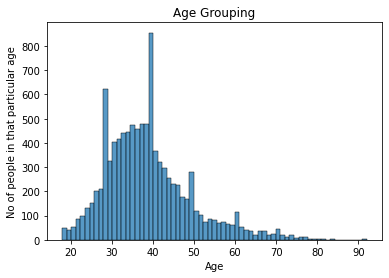

In [7]:
sns.histplot(df.Age).set(title = 'Age Grouping')
plt.xlabel('Age')
plt.ylabel('No of people in that particular age')

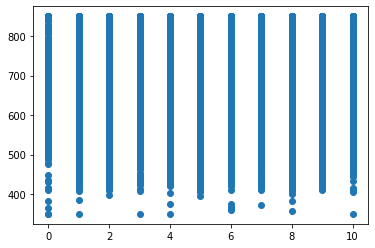

In [8]:
plt.scatter(df.Tenure, df.CreditScore)

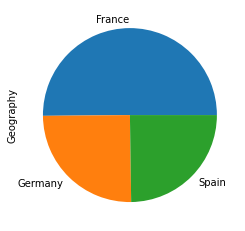

In [9]:
geo = df['Geography'].value_counts()
geo.plot(kind="pie")

Text(0, 0.5, 'No of people')

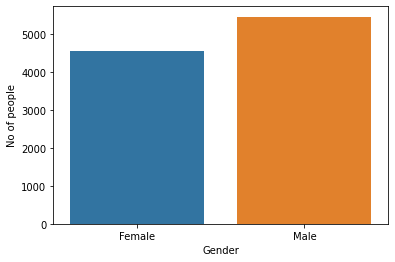

In [10]:
sns.countplot(x=df['Gender'])
plt.xlabel('Gender')
plt.ylabel('No of people')

## Bi - Variate Analysis

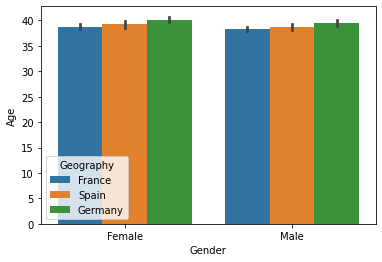

In [11]:
sns.barplot(data = df, x="Gender", y="Age", hue="Geography" )

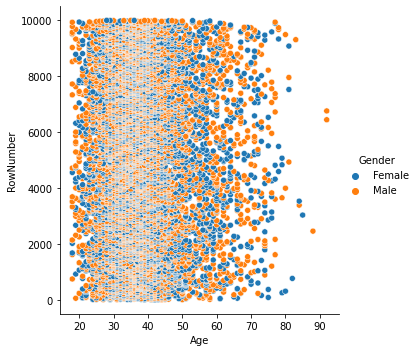

In [12]:
sns.relplot(x="Age", y="RowNumber", hue="Gender", data=df)

## Multivariate analysis

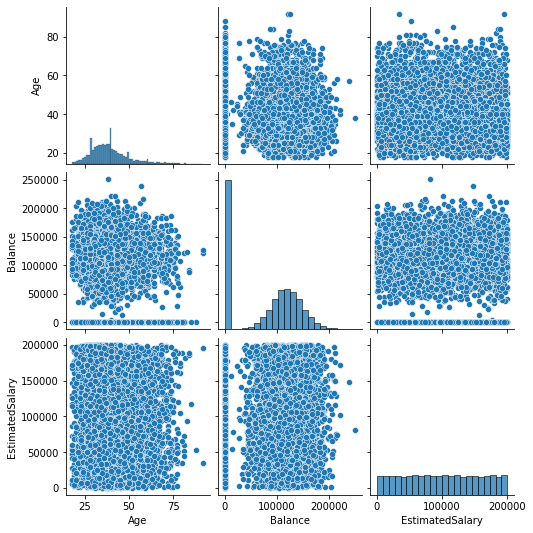

In [13]:
sns.pairplot(data = df[["Age","Balance","EstimatedSalary"]])

## 4.Perform descriptive statistics on the dataset

In [14]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## 5.Handle the Missing values

In [16]:
df.isnull().sum() #There are no missing values in the given dataset

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## 6.Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


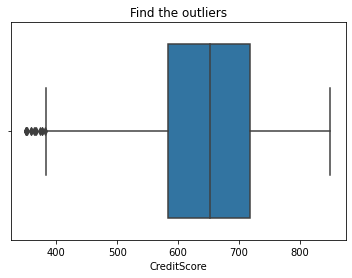

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


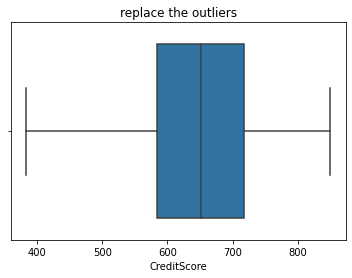

In [17]:
def replace_outliers(df, field_name):
    Q1 = np.percentile(df[field_name],25,interpolation='midpoint')
    Q3 = np.percentile(df[field_name],75,interpolation='midpoint')
    IQR = Q3-Q1
    maxi = Q3+1.5*IQR
    mini = Q1-1.5*IQR
    df[field_name]=df[field_name].mask(df[field_name]>maxi,maxi)
    df[field_name]=df[field_name].mask(df[field_name]<mini,mini)

plt.title("Find the outliers")
sns.boxplot(df['CreditScore'])
plt.show()
plt.title("replace the outliers")
replace_outliers(df, 'CreditScore')
sns.boxplot(df['CreditScore'])
plt.show()

## 7.Check for categorical column and perform encoding

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#we are going to encode gender and geography only
df['Gender'] = le.fit_transform(df['Gender'])
df['Geography'] = le.fit_transform(df['Geography'])
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608.0,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502.0,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.0,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,2,0,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645.0,2,1,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822.0,0,1,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,383.0,1,0,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501.0,0,1,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684.0,0,1,27,2,134603.88,1,1,1,71725.73,0


## 8.Data Splitting

In [19]:
dependent_variable = df[['Exited']]
dependent_variable

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [20]:
independent_variables = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']]
independent_variables


,CreditScore,Geography,Gender,Age,Tenure,Balance,EstimatedSalary
0,619.0,0,0,42,2,0.00,101348.88
1,608.0,2,0,41,1,83807.86,112542.58
2,502.0,0,0,42,8,159660.80,113931.57
3,699.0,0,0,39,1,0.00,93826.63
4,850.0,2,0,43,2,125510.82,79084.10
...,...,...,...,...,...,...,...
9995,771.0,0,1,39,5,0.00,96270.64
9996,516.0,0,1,35,10,57369.61,101699.77
9997,709.0,0,0,36,7,0.00,42085.58
9998,772.0,1,1,42,3,75075.31,92888.52


## 9.Scale the independent variables

In [21]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled = scale.fit_transform(independent_variables)
print(scaled)

[[-0.32687761 -0.90188624 -1.09598752 ... -1.04175968 -1.22584767
   0.02188649]
 [-0.44080365  1.51506738 -1.09598752 ... -1.38753759  0.11735002
   0.21653375]
 [-1.53863634 -0.90188624 -1.09598752 ...  1.03290776  1.33305335
   0.2406869 ]
 ...
 [ 0.60524449 -0.90188624 -1.09598752 ...  0.68712986 -1.22584767
  -1.00864308]
 [ 1.25772996  0.30659057  0.91241915 ... -0.69598177 -0.02260751
  -0.12523071]
 [ 1.4648682  -0.90188624 -1.09598752 ... -0.35020386  0.85996499
  -1.07636976]]


## 10.Split the data into training and testing

In [22]:
from sklearn.model_selection import train_test_split
Xdf=df.drop(["Exited"], axis=1)
Ydf=df["Exited"]
X_train,X_test,y_train,y_test = train_test_split(Xdf,Ydf, test_size=0.25,random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7500, 13)
(2500, 13)
(7500,)
(2500,)
